# Лабораторная работа №1

# Назаров Рустам M3232

# Вариант 13

## Аналитическая часть

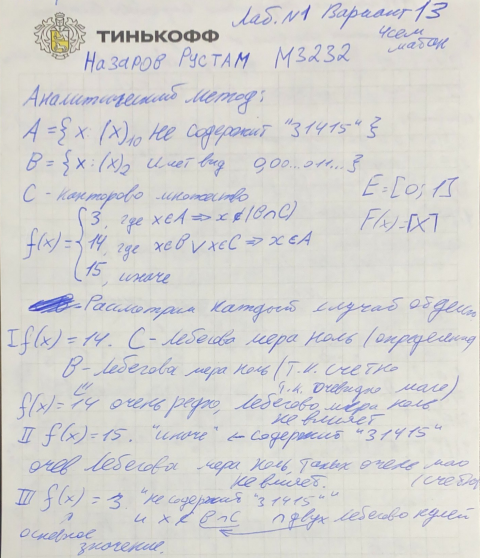

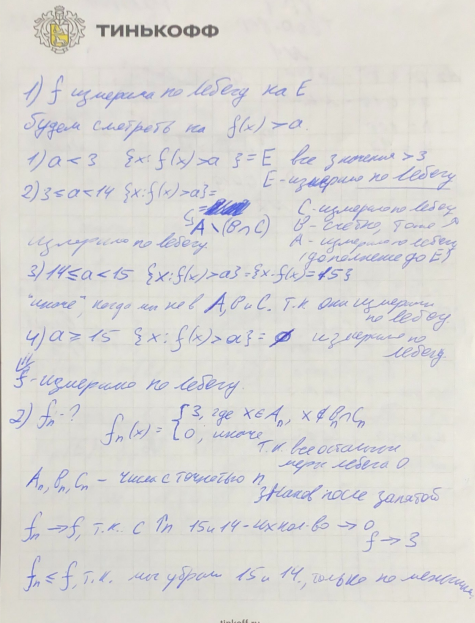

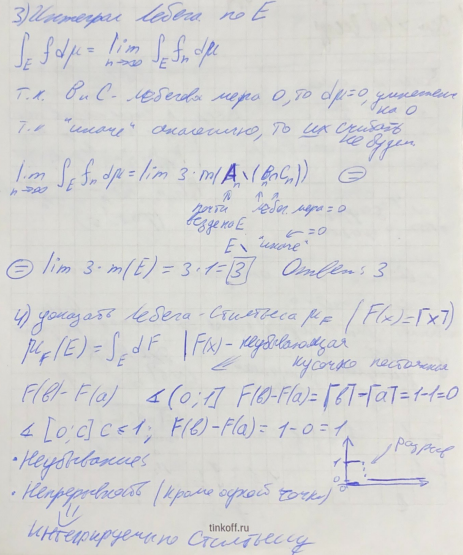

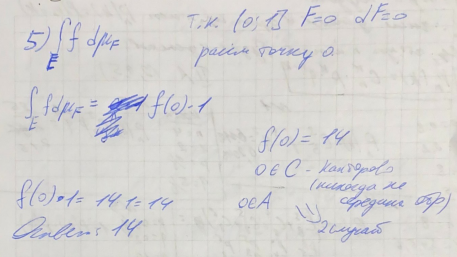

## Численная часть

Python 3.8
импорты

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import math
import time

In [44]:
# Функция для проверки, принадлежит ли точка к Канторову множеству
def is_in_cantor_set(x, n):
    for _ in range(n):
        x *= 3
        if x > 1 and x < 2:  # Если точка попадает в средний удаленный интервал
            return False
        x %= 1  # Оставляем только дробную часть
    return True

In [54]:
def float_to_binary(x, n): # преобразование в двоичную
    # Получаем дробную часть числа
    x -= int(x)
    binary = "."
    for _ in range(n):
        x *= 2
        if x >= 1:
            binary += "1"
            x -= 1
        else:
            binary += "0"
    return binary

In [46]:
# Функция для проверки, что число имеет вид 0,00...0111...
def has_ones_at_end(x, n):
    # Преобразуем число в двоичную строку с n знаками после запятой
    x_bin = float_to_binary(x, n)
    # Преобразуем число в строку без '0.' в начале и ограничиваем длину до n знаков после запятой
    # x_str = format(x, f'.{n}f').split('.')[1]
    # Ищем индекс первой единицы с конца строки
    index_of_one = x_bin.rfind('1')
    # Проверяем, что все символы после этой единицы также являются единицами
    return index_of_one != -1 and x_bin[index_of_one:] == '1' * (len(x_bin) - index_of_one)

In [70]:
# Функция f_n
def f_n(x, n):
    if '31415' in format(x, '.100f'):  # Проверяем наличие последовательности '31415'
        return 15
    elif is_in_cantor_set(x, n) or has_ones_at_end(x, n):
        return 14
    else:
        return 3

### 1. Строим f_n, чтобы увидеть, как стремимся к f

f_n сделаем честной, чтобы численный метод отработал честно. Не будем отбрасывать 15 и 14. Будем работать с **аппроксимацией**.

То есть наши множества А В С ограничены n числами после запятой

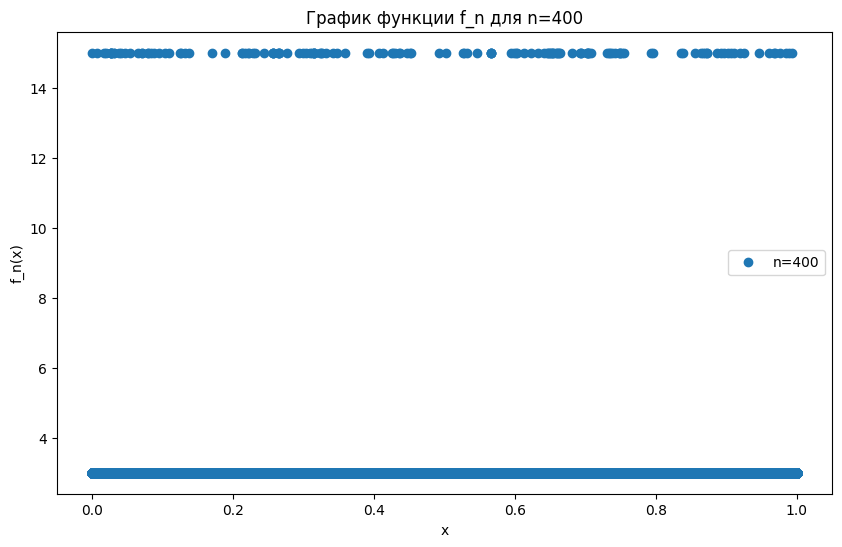

Время построения графика для n=400: 46.713651180267334 секунд


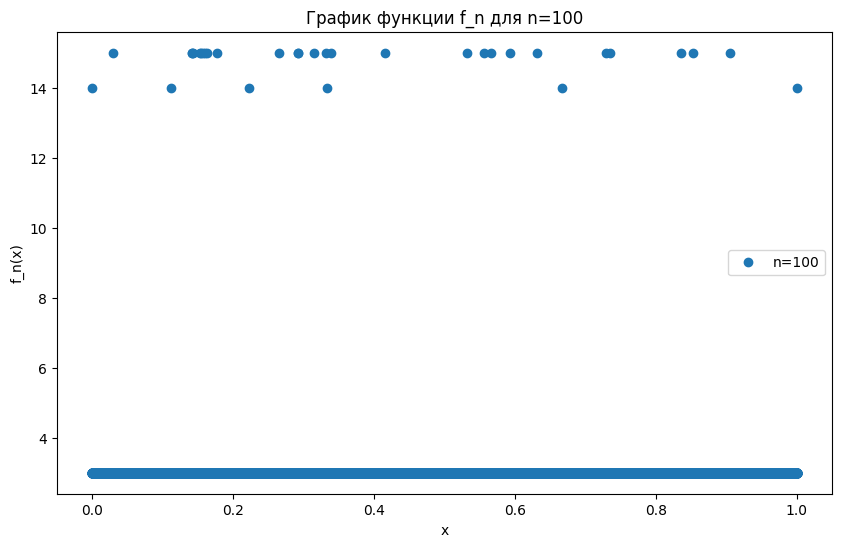

Время построения графика для n=100: 3.706197738647461 секунд


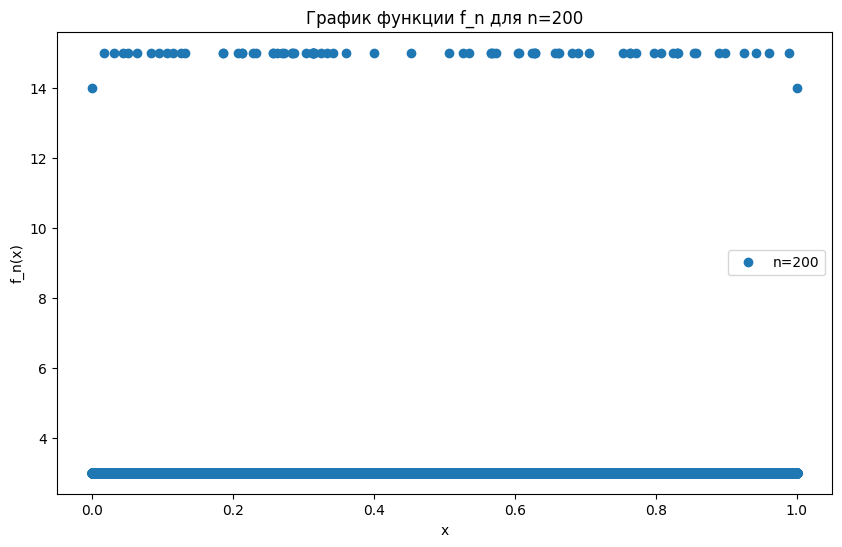

Время построения графика для n=200: 13.45967411994934 секунд


KeyboardInterrupt: 

In [71]:
# Задайте значения n, для которых нужно построить графики
n_values = [100, 200, 400]

# Цикл для построения графиков для каждого значения n
for n in n_values:
    start_time = time.time()  # Начало замера времени
    # Задайте диапазон x
    x_values = np.linspace(0, 1, 1000 * n)
    # Вычислите значения функции f_n для текущего n
    y_values = [f_n(x, n) for x in x_values]

    # Постройте график
    plt.figure(figsize=(10, 6))  # Создайте новую фигуру для каждого графика
    plt.plot(x_values, y_values, 'o', label=f'n={n}')
    plt.title(f'График функции f_n для n={n}')
    plt.xlabel('x')
    plt.ylabel('f_n(x)')
    plt.legend()
    plt.show()

    end_time = time.time()  # Конец замера времени
    print(f"Время построения графика для n={n}: {end_time - start_time} секунд")

### Что и требовалось доказать. f_n <= f. Постепенно появляются значения 15 и 14, подходим к количеству 15 и 14 обычной функции. Связано с увеличением числел после запятой. Так же видно, что в основном мы равны трем. 14 и 15 являются лебеговой мерой ноль.

## 2. Вычислим интеграл Лебега

Сначала сделаем через библиотеку

In [72]:
# Вычисление интеграла для разных значений n
for n in [100000]:  # Примеры значений n
    start_time = time.time()  # Начало замера времени

    integral, error = quad(f_n, 0, 1, args=(n,))
    print(f"----------Интеграл f_n для n={n}: {integral}, с погрешностью {error}-----------")

    end_time = time.time()  # Конец замера времени
    print(f"Время для n={n}: {end_time - start_time} секунд\n")

----------Интеграл f_n для n=100000: 3.0, с погрешностью 3.3306690738754696e-14-----------
Время для n=100000: 0.9390442371368408 секунд



Теперь найдем честно

In [63]:
# Метод прямоугольников для вычисления интеграла
def rectangle_method(f, a, b, n):
    total_sum = 0
    delta_x = (b - a) / n
    for i in range(n):
        x = a + i * delta_x
        total_sum += f(x, n) * delta_x
    return total_sum


In [64]:
# Вычисление интеграла для разных значений n
for n in [100, 1000, 10000]:  # Примеры значений n
    start_time = time.time()  # Начало замера времени

    integral = rectangle_method(f_n, 0, 1, n)
    print(f"-----------Интеграл f_n для n={n}: {integral}----------")

    end_time = time.time()  # Конец замера времени
    print(f"Время графика для n={n}: {end_time - start_time} секунд\n")

-----------Интеграл f_n для n=100: 3.329999999999994----------
Время графика для n=100: 0.0030012130737304688 секунд

-----------Интеграл f_n для n=1000: 3.033000000000003----------
Время графика для n=1000: 0.29366278648376465 секунд

-----------Интеграл f_n для n=10000: 3.0033000000004817----------
Время графика для n=10000: 47.44346880912781 секунд



### Видно стремление к 3. Как и ожидали в аналитике.

## 3. Интеграл Лебега-Стилтьеса

In [65]:
def g(x):
    return math.ceil(x) # наша функция F

In [66]:
# Метод прямоугольников для вычисления интеграла Лебега-Стилтьеса
def lebesgue_stieltjes_integral(f, g, a, b, n):
    total_sum = 0
    delta_x = (b - a) / n
    for i in range(n):
        x = a + i * delta_x
        total_sum += f(x, i) * (g(x + delta_x) - g(x))
    return total_sum

In [67]:
# Вычисление интеграла для разных значений n
for n in [100, 1000, 10000]:  # Примеры значений n
    start_time = time.time()  # Начало замера времени

    integral = lebesgue_stieltjes_integral(f_n, g, 0, 1, n)
    print(f"-------------Интеграл Лебега-Стилтьеса f_n для n={n}: {integral}-----------")

    end_time = time.time()  # Конец замера времени
    print(f"Время графика для n={n}: {end_time - start_time} секунд\n")

-------------Интеграл Лебега-Стилтьеса f_n для n=100: 14-----------
Время графика для n=100: 0.0010046958923339844 секунд

-------------Интеграл Лебега-Стилтьеса f_n для n=1000: 14-----------
Время графика для n=1000: 0.12611007690429688 секунд

-------------Интеграл Лебега-Стилтьеса f_n для n=10000: 14-----------
Время графика для n=10000: 20.455270051956177 секунд



### Как и думали в аналитике. Мы всегда равны 14. Потому что при всех значениях кроме нуля мы равны нулю. В нуле же мы являемся частью множества А В С и равны 14.

# Выводы: Получили все, что и в аналитике. Мы стремимся к 3, так как на множестве Е равны 3, почти всюду. Интеграл Стилтьеса равен 14, так как емеет значение только точка 0, где мы равны 14. Код все подтвердил

## Множества при которых f(x) = 14 или 15 лебеговой меры ноль это было в аналитике и численный метод подтвердил.

## На Стилтьессе же (0;1] интеграл равен нулю, как и ожидалось, это подтвердил Численный метод